# API WRAPPERS

In [ ]:
Like Api but more optimized by data scientists than simply RESTful API based websites

In [6]:
!pip install quandl

In [9]:
import quandl      #quandl is a library made for financial analysis
import getpass
quandl.ApiConfig.api_key=getpass.getpass()

········


In [3]:
import pandas as pd

In [4]:
companies=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-1/companies.csv')

In [5]:
companies

,Ticker,Company
0,AAPL,Apple Inc.
1,NFLX,"Netflix, Inc."
2,AMZN,"Amazon.com, Inc."
3,MSFT,Microsoft Corporation
4,GOOG,Alphabet Inc.
5,TSLA,"Tesla Motors, Inc."
6,FB,"Facebook, Inc."
7,AAP,Advance Auto Parts Inc.
8,DIS,The Walt Disney Company
9,NKE,"NIKE, Inc."


In [10]:
quandl.get('WIKI/AAPL')['Adj. Close']

Date
1980-12-12      0.422706
1980-12-15      0.400652
1980-12-16      0.371246
1980-12-17      0.380362
1980-12-18      0.391536
                 ...    
2018-03-21    171.270000
2018-03-22    168.845000
2018-03-23    164.940000
2018-03-26    172.770000
2018-03-27    168.340000
Name: Adj. Close, Length: 9400, dtype: float64

In [11]:
#to see just tickers
companies.Ticker 

0     AAPL
1     NFLX
2     AMZN
3     MSFT
4     GOOG
5     TSLA
6       FB
7      AAP
8      DIS
9      NKE
10      UA
11     BAC
12     CCL
13      CI
14     AAL
15     LUV
16     WFC
17     WMT
18      HD
19    ORCL
20     IBM
21    NCLH
22     RCL
23     TWX
24     FOX
25       F
26     GCI
27     XOM
28     WWE
29      WM
Name: Ticker, dtype: object

In [13]:
#to make it to a list 
ticker_list=companies.Ticker.to_list()

In [16]:
def get_prices(ticker: str) -> pd.DataFrame:       #the ticker must be a string    the PD.DataFrame is decoration 
        print('retrieving data for', ticker)
        prices = quandl.get(f'WIKI/{ticker}')['Adj. Close'].reset_index()   #reset index is to convert the index to based on reset index
        prices['Ticker']=ticker
        return prices
    

In [17]:
get_prices('MSFT')

retrieving data for MSFT


,Date,Adj. Close,Ticker
0,1986-03-13,0.064720,MSFT
1,1986-03-14,0.067031,MSFT
2,1986-03-17,0.068187,MSFT
3,1986-03-18,0.066454,MSFT
4,1986-03-19,0.065298,MSFT
...,...,...,...
8071,2018-03-21,92.480000,MSFT
8072,2018-03-22,89.790000,MSFT
8073,2018-03-23,87.180000,MSFT
8074,2018-03-26,93.780000,MSFT


In [18]:
lodf=list(map(get_prices, ticker_list))

retrieving data for AAPL
retrieving data for NFLX
retrieving data for AMZN
retrieving data for MSFT
retrieving data for GOOG
retrieving data for TSLA
retrieving data for FB
retrieving data for AAP
retrieving data for DIS
retrieving data for NKE
retrieving data for UA
retrieving data for BAC
retrieving data for CCL
retrieving data for CI
retrieving data for AAL
retrieving data for LUV
retrieving data for WFC
retrieving data for WMT
retrieving data for HD
retrieving data for ORCL
retrieving data for IBM
retrieving data for NCLH
retrieving data for RCL
retrieving data for TWX
retrieving data for FOX
retrieving data for F
retrieving data for GCI
retrieving data for XOM
retrieving data for WWE
retrieving data for WM


In [20]:
lodf[1]

,Date,Adj. Close,Ticker
0,2002-05-23,1.196429,NFLX
1,2002-05-24,1.210000,NFLX
2,2002-05-28,1.157143,NFLX
3,2002-05-29,1.103571,NFLX
4,2002-05-30,1.071429,NFLX
...,...,...,...
3983,2018-03-21,316.480000,NFLX
3984,2018-03-22,306.700000,NFLX
3985,2018-03-23,300.940000,NFLX
3986,2018-03-26,320.350000,NFLX


In [24]:
data=pd.concat(lodf)

In [27]:
#PIVOT TABLE = to make data visually more appealing (for 3 columns)


#dfpvt=data.pivot_table(index='Date', columns='Ticker', values='Adj. Close')

In [28]:
#absolute value difference 

dfpvt.diff()

Ticker,AAL,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,F,FB,...,ORCL,RCL,TSLA,TWX,UA,WFC,WM,WMT,WWE,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001896,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000493,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000493,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,-1.23,0.99,-3.970,-4.65,-0.11,-0.79,2.05,0.470000,0.11,1.24,...,-0.03,-1.49,5.98,0.11,0.06,-0.11,-0.35,0.23,-0.19,1.05
2018-03-22,-1.78,-3.53,-2.425,-37.76,-1.32,-0.86,-1.71,-1.220000,-0.35,-4.50,...,-1.13,-3.19,-7.43,-1.03,-0.36,-2.26,-1.68,-1.04,-0.40,-1.54
2018-03-23,-1.30,-0.87,-3.905,-48.54,-1.38,-1.79,-1.34,-2.060000,-0.19,-5.50,...,-1.10,-3.14,-7.56,-1.69,0.01,-1.55,-1.34,-1.72,-0.08,-0.61


In [29]:
dfpvt.tail()    

Ticker,AAL,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,F,FB,...,ORCL,RCL,TSLA,TWX,UA,WFC,WM,WMT,WWE,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-21,54.09,115.24,171.270,1581.86,31.87,67.06,167.05,101.82,11.10,169.39,...,47.02,123.37,316.53,95.29,14.07,54.79,85.92,88.18,36.30,75.04
2018-03-22,52.31,111.71,168.845,1544.10,30.55,66.20,165.34,100.60,10.75,164.89,...,45.89,120.18,309.10,94.26,13.71,52.53,84.24,87.14,35.90,73.50
2018-03-23,51.01,110.84,164.940,1495.56,29.17,64.41,164.00,98.54,10.56,159.39,...,44.79,117.04,301.54,92.57,13.72,50.98,82.90,85.42,35.82,72.89
2018-03-26,51.86,114.77,172.770,1555.86,30.44,65.80,168.68,100.65,10.83,160.06,...,46.48,119.92,304.18,93.99,14.46,52.29,84.13,87.50,36.90,74.00
2018-03-27,50.90,115.01,168.340,1497.05,29.52,65.73,165.54,99.36,10.83,152.19,...,45.38,118.30,279.18,94.20,14.32,51.10,83.29,86.05,36.18,73.70


In [30]:
#percentage difference 

dfpvt.pct_change().tail()

Ticker,AAL,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,F,FB,...,ORCL,RCL,TSLA,TWX,UA,WFC,WM,WMT,WWE,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-21,-0.022234,0.008665,-0.022655,-0.002931,-0.003440,-0.011643,0.012424,0.004637,0.010009,0.007374,...,-0.000638,-0.011933,0.019256,0.001156,0.004283,-0.002004,-0.004057,0.002615,-0.005207,0.014191
2018-03-22,-0.032908,-0.030632,-0.014159,-0.023871,-0.041418,-0.012824,-0.010236,-0.011982,-0.031532,-0.026566,...,-0.024032,-0.025857,-0.023473,-0.010809,-0.025586,-0.041248,-0.019553,-0.011794,-0.011019,-0.020522
2018-03-23,-0.024852,-0.007788,-0.023128,-0.031436,-0.045172,-0.027039,-0.008105,-0.020477,-0.017674,-0.033356,...,-0.023970,-0.026127,-0.024458,-0.017929,0.000729,-0.029507,-0.015907,-0.019738,-0.002228,-0.008299
2018-03-26,0.016663,0.035457,0.047472,0.040319,0.043538,0.021580,0.028537,0.021413,0.025568,0.004204,...,0.037732,0.024607,0.008755,0.015340,0.053936,0.025696,0.014837,0.024350,0.030151,0.015228
2018-03-27,-0.018511,0.002091,-0.025641,-0.037799,-0.030223,-0.001064,-0.018615,-0.012817,0.000000,-0.049169,...,-0.023666,-0.013509,-0.082188,0.002234,-0.009682,-0.022758,-0.009985,-0.016571,-0.019512,-0.004054


<AxesSubplot:xlabel='Date'>

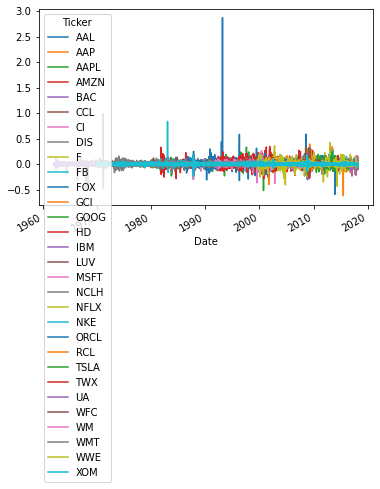

In [31]:
dfpvt.pct_change().plot()

TypeError: 'AxesSubplot' object is not subscriptable

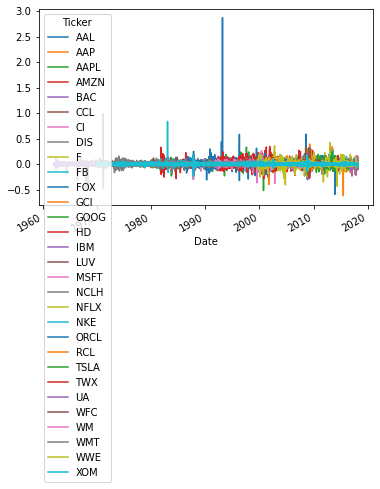

In [32]:
dfpvt.pct_change().plot()

In [116]:
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
link='https://query1.finance.yahoo.com/v1/finance/screener?crumb=00%2Finl.UKdq&lang=en-US&region=US&formatted=true&corsDomain=finance.yahoo.com'

In [117]:
headers='''accept: */*
accept-encoding: gzip, deflate, br
accept-language: en-GB,en-US;q=0.9,en;q=0.8,fr;q=0.7
cache-control: no-cache
content-length: 566
content-type: application/json
cookie: APID=UPd136432b-66b5-11eb-8c62-0291f2e222b6; B=1rmiql5g0u7kh&b=3&s=qm; A1=d=AQABBJEeD2ACEM3sxN7U_y0JfchRPqla2h0FEgABAgE9LWD1YPbPb2UBgiIAAAcIkR4PYKla2h0&S=AQAAAjENqnJP2GCwA9rr5y9Zcyc; A3=d=AQABBJEeD2ACEM3sxN7U_y0JfchRPqla2h0FEgABAgE9LWD1YPbPb2UBgiIAAAcIkR4PYKla2h0&S=AQAAAjENqnJP2GCwA9rr5y9Zcyc; A1S=d=AQABBJEeD2ACEM3sxN7U_y0JfchRPqla2h0FEgABAgE9LWD1YPbPb2UBgiIAAAcIkR4PYKla2h0&S=AQAAAjENqnJP2GCwA9rr5y9Zcyc&j=GDPR; GUC=AQABAgFgLT1g9UIgiASi; EuConsent=CPBtzigPBtzigAOACCENBACgAAAAAAAAACiQAAAAAAAA; thamba=2; cmp=v=18&t=1613658098&j=1
origin: https://finance.yahoo.com
pragma: no-cache
referer: https://finance.yahoo.com/most-active?count=25&offset=25
sec-fetch-dest: empty
sec-fetch-mode: cors
sec-fetch-site: same-siteuser-agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36'''

In [118]:
payload='''{"offset":25,"size":25,"sortField":"dayvolume","sortType":"DESC","quoteType":"EQUITY","query":{"operator":"AND","operands":[{"operator":"or","operands":[{"operator":"EQ","operands":["region","us"]},{"operator":"EQ","operands":["region","fr"]},{"operator":"EQ","operands":["region","gb"]},{"operator":"EQ","operands":["region","de"]},{"operator":"EQ","operands":["region","cn"]},{"operator":"EQ","operands":["region","jp"]}]},{"operator":"or","operands":[{"operator":"BTWN","operands":["intradaymarketcap",2000000000,10000000000]}]}]},"userId":"","userIdType":"guid"}'''
headers= dict(i.split(': ') for i in headers.split('\n'))
resp=r.post(link, headers=headers, data=payload)
data=resp.json()['finance']['result'][0]['quotes']

ValueError: dictionary update sequence element #12 has length 3; 2 is required

In [109]:
data

[{'symbol': 'SASOF',
  'twoHundredDayAverageChangePercent': {'raw': 0.5785708, 'fmt': '57.86%'},
  'fiftyTwoWeekLowChangePercent': {'raw': 9.979838, 'fmt': '997.98%'},
  'language': 'en-US',
  'regularMarketDayRange': {'raw': '13.615 - 13.615', 'fmt': '13.61 - 13.61'},
  'regularMarketDayHigh': {'raw': 13.615, 'fmt': '13.61'},
  'twoHundredDayAverageChange': {'raw': 4.9901094, 'fmt': '4.99'},
  'twoHundredDayAverage': {'raw': 8.62489, 'fmt': '8.62'},
  'askSize': {'raw': 0, 'fmt': '0', 'longFmt': '0'},
  'marketCap': {'raw': 8512533504,
   'fmt': '8.513B',
   'longFmt': '8,512,533,504'},
  'fiftyTwoWeekHighChange': {'raw': -5.3050003, 'fmt': '-5.31'},
  'fiftyTwoWeekRange': {'raw': '1.24 - 18.92', 'fmt': '1.24 - 18.92'},
  'fiftyDayAverageChange': {'raw': 2.2931252, 'fmt': '2.29'},
  'firstTradeDateMilliseconds': 1348579800000,
  'exchangeDataDelayedBy': 0,
  'averageDailyVolume3Month': {'raw': 1246,
   'fmt': '1,246',
   'longFmt': '1,246'},
  'fiftyTwoWeekLow': {'raw': 1.24, 'fmt': '

In [70]:
l=list(range(0,9132,25))

In [85]:
type(l)

list

In [124]:
for i in range(0,10000,25):
    print(f"I love you {i*2})")

I love you 0)
I love you 50)
I love you 100)
I love you 150)
I love you 200)
I love you 250)
I love you 300)
I love you 350)
I love you 400)
I love you 450)
I love you 500)
I love you 550)
I love you 600)
I love you 650)
I love you 700)
I love you 750)
I love you 800)
I love you 850)
I love you 900)
I love you 950)
I love you 1000)
I love you 1050)
I love you 1100)
I love you 1150)
I love you 1200)
I love you 1250)
I love you 1300)
I love you 1350)
I love you 1400)
I love you 1450)
I love you 1500)
I love you 1550)
I love you 1600)
I love you 1650)
I love you 1700)
I love you 1750)
I love you 1800)
I love you 1850)
I love you 1900)
I love you 1950)
I love you 2000)
I love you 2050)
I love you 2100)
I love you 2150)
I love you 2200)
I love you 2250)
I love you 2300)
I love you 2350)
I love you 2400)
I love you 2450)
I love you 2500)
I love you 2550)
I love you 2600)
I love you 2650)
I love you 2700)
I love you 2750)
I love you 2800)
I love you 2850)
I love you 2900)
I love you 2950)
I l